<a href="https://colab.research.google.com/github/Elianaribs/Portifolio-data-analytics/blob/main/Correla%C3%A7%C3%A3o%20e%20Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stats
import statsmodels.api as sm
import scipy as scp
from statsmodels.formula.api import ols

#Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:

In [ ]:
df = pd.read_csv('/content/3LWxnSPoTikFflATrLPV_kc_house_data.csv.xls')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(9999, 21)

## 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
##Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [ ]:
# selecionando as variáveis numéricas
var_num = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
corr_matriz = var_num.corr()

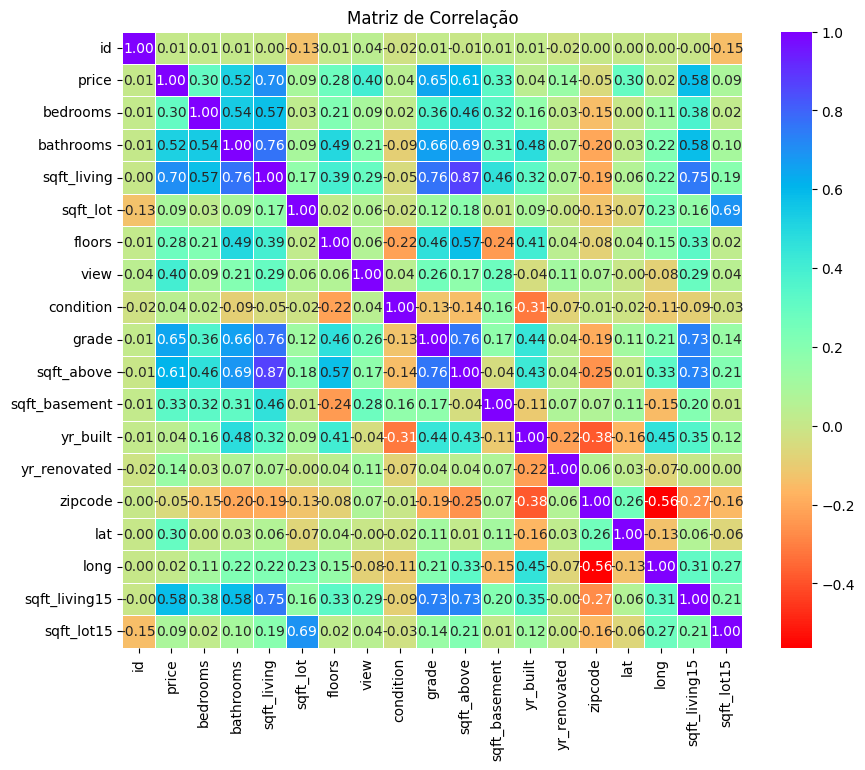

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matriz, annot=True, cmap='rainbow_r', fmt= ".2f", linewidths= 0.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Correlação entre "Price" e "Bedrooms"
corr_price_bedrooms = df['price'].corr(df['bedrooms'])
print("Correlação entre 'Price' e 'Bedrooms':", corr_price_bedrooms)

Correlação entre 'Price' e 'Bedrooms': 0.29920721616918206


In [ ]:
# Considerando apenas as casas com mais de 2000 pés quadrados
df_2000 = df[df['sqft_living'] > 2000]
df_2000['sqft_living'].describe()

,sqft_living
count,4461.000000
mean,2820.606142
std,805.948691
min,2005.000000
25%,2260.000000
50%,2600.000000
75%,3130.000000
max,12050.000000


In [ ]:
# Correlação entre 'price' e 'bedrooms' entre casas com mais de 200 pés quadrados
corr_price_bedrooms_2000 = df_2000['price'].corr(df_2000['bedrooms'])
print("Correlação entre 'Price' e 'Bedrooms' entre casas com mais de 2000 pés quadrados:", corr_price_bedrooms_2000)

Correlação entre 'Price' e 'Bedrooms' entre casas com mais de 2000 pés quadrados: 0.11912115548964147


## 2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?


In [ ]:
# FIltrando apenas as casas com dois banheiros ou mais
df_bath = df[df['bathrooms'] >= 2]

In [ ]:
# Correlação entre 'price' e 'área total' entre casas com dois banheiros ou mais
corr_price_bath = df_bath['price'].corr(df_bath['sqft_living'])
print("Correlação entre 'Price' e 'Área Total' entre casas com dois banheiros ou mais:", corr_price_bath)

Correlação entre 'Price' e 'Área Total' entre casas com dois banheiros ou mais: 0.7067107107996193


## 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [ ]:
# Criando uma função que retorna a correlação entre o preço e a quantidade de banheiros
def corr_bath_price(df, n_bath):
  df_bath_n = df[df['bathrooms'] == n_bath]
  corr_price_sqft_bath = df_bath_n['price'].corr(df_bath_n['sqft_living'])
  return corr_price_sqft_bath

In [ ]:
# Loop For para mostrar todas as correlações
for n_bath in range(0, int(df['bathrooms'].max())):
  print(f'Correlação entre preço e área total para {n_bath} banheiros: {corr_bath_price(df, n_bath)}')

Correlação entre preço e área total para 0 banheiros: 0.9168369900304426
Correlação entre preço e área total para 1 banheiros: 0.35952866286208274
Correlação entre preço e área total para 2 banheiros: 0.4469445867495836
Correlação entre preço e área total para 3 banheiros: 0.5690329087491449
Correlação entre preço e área total para 4 banheiros: 0.5844797954618549
Correlação entre preço e área total para 5 banheiros: 0.747218507200078
Correlação entre preço e área total para 6 banheiros: 1.0
Correlação entre preço e área total para 7 banheiros: nan


##4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?


In [ ]:
# Filtrando apenas as casas com 3000 pés quadrados ou mais
df_3000 = df[df['sqft_living'] >= 3000]

In [ ]:
# Correlação entre condition e price das casas com 3000 pés quadrados ou mais
corr_condition_price = df_3000['condition'].corr(df_3000['price'])
print("Correlação entre 'condition' e 'price' entre casas com mais de 3000 pés quadrados:", corr_condition_price)

Correlação entre 'condition' e 'price' entre casas com mais de 3000 pés quadrados: 0.1051501629377982


##5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
# Filtrando as casas com 3 quartos ou mais
df_3_bed = df[df['bedrooms'] >= 3]

In [ ]:
# Correlação entre a localização geográfica lat e long e o preço price para as casas com 3 quartos ou mais
corr_room = df_3_bed[['lat', 'long']].corrwith(df_3_bed['price'])
print("Correlação entre 'lat' e 'long' e 'price' entre casas com 3 quartos ou mais:", corr_room)

Correlação entre 'lat' e 'long' e 'price' entre casas com 3 quartos ou mais: lat     0.312555
long   -0.007275
dtype: float64


##6. Calcule a correlação entre uma variável categórica (waterfront) e uma variável numérica(price) usando ANOVA.

In [ ]:
# ANOVA
model = ols('price ~ C(waterfront)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(waterfront),1.250790e+14,1.0,964.573325,2.973808e-202
Residual,1.296339e+15,9997.0,NaN,NaN


#Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:


In [ ]:
df2 = pd.read_csv('/content/KiDGoGwdReiYs1dzcXou_car_price.csv.xls')
df2.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
df2.dtypes

,0
Make,object
Model,object
Price,int64
Year,int64
Kilometer,int64
Fuel Type,object
Transmission,object
Location,object
Color,object
Owner,object


## 7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [ ]:
# selecionando as variáveis numéricas
var_nume = df2.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
corre_matriz = var_nume.corr()

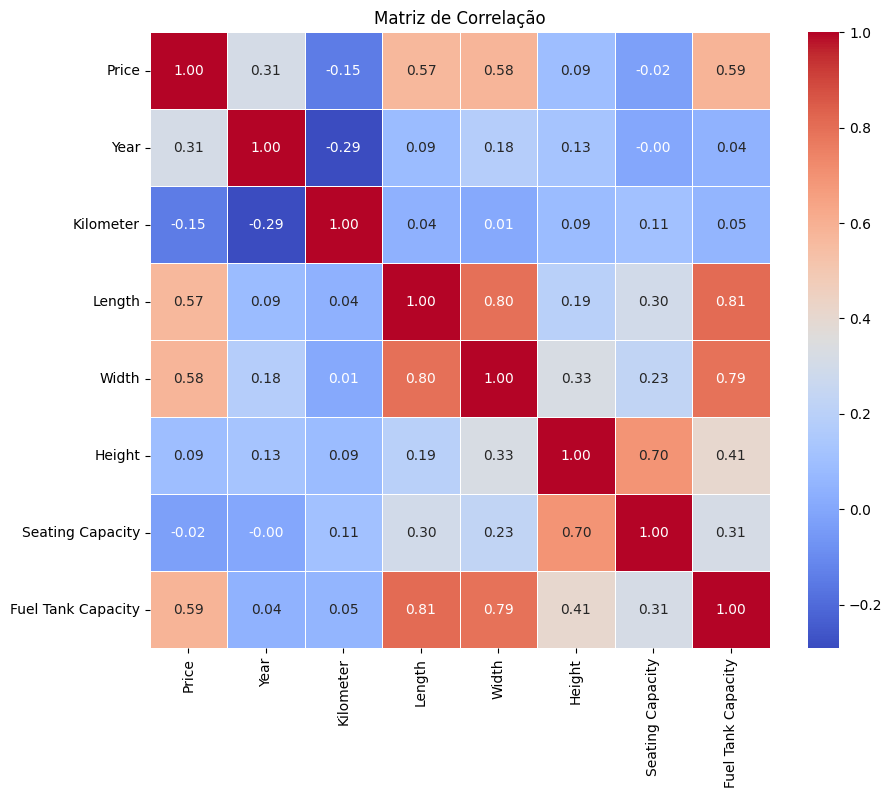

In [ ]:
# Plot
plt.figure(figsize=(10, 8))
sb.heatmap(corre_matriz, annot=True, cmap='coolwarm', fmt= ".2f", linewidths= 0.5)
plt.title('Matriz de Correlação')
plt.show()

Correlação positiva: price x fuel tank capacity
Correlação neutra : price x Seating capacity
Correlação negativa: price x kilometer

##8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.


In [ ]:
# Removendo a coluna 'Price' das variáveis numéricas
var_nume = var_nume.drop('Price', axis=1)

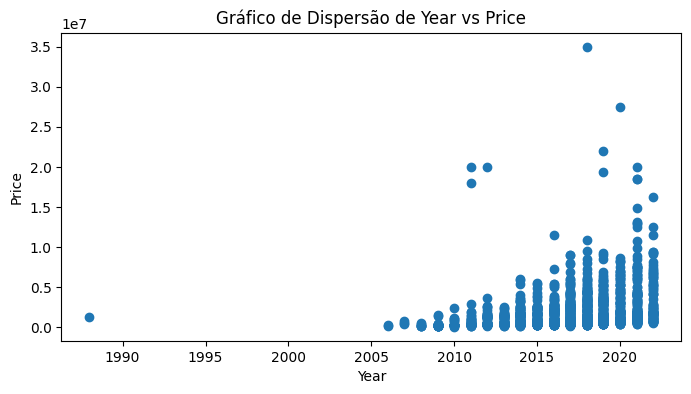

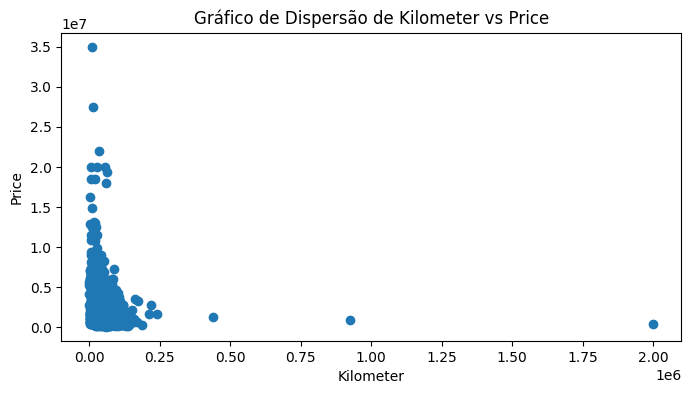

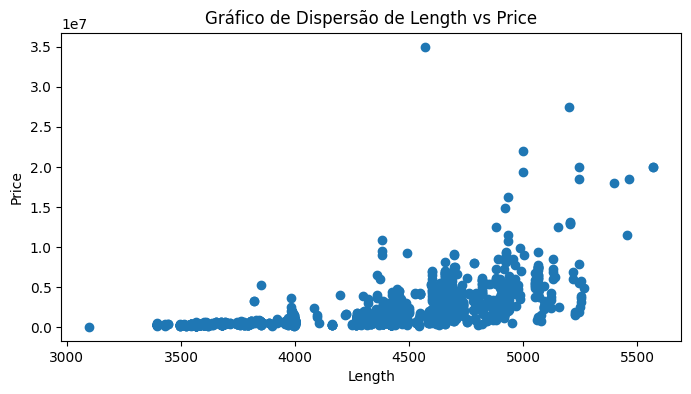

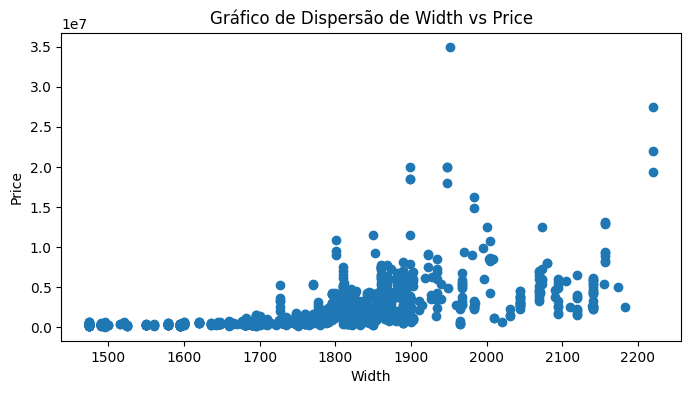

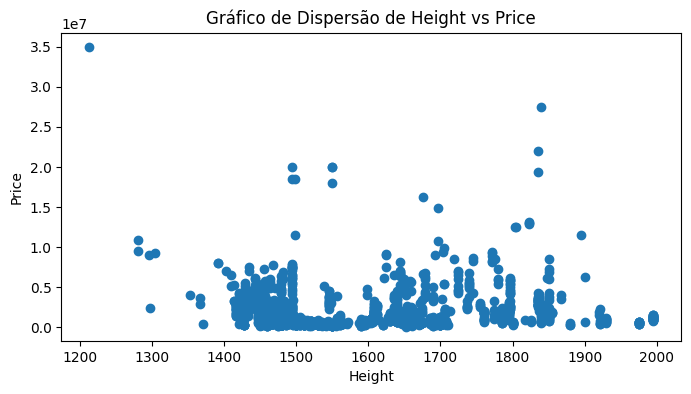

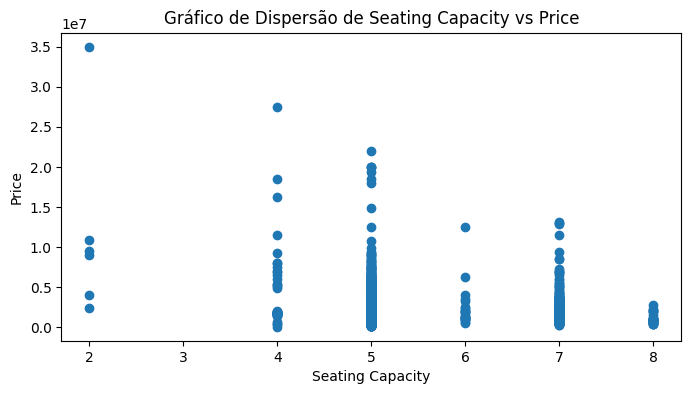

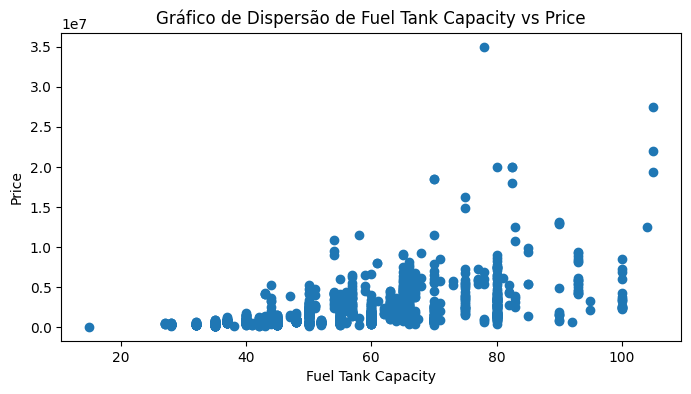

In [ ]:
# Loop For para imprimir os gráficos de dispersão
for col in var_nume.columns:
  plt.figure(figsize=(8, 4))
  plt.scatter(df2[col], df2['Price'])
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.title(f'Gráfico de Dispersão de {col} vs Price')
  plt.show()

##9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [ ]:
# Definir X e Y
X = df2['Year']
Y = df2['Price']

#  Adicionando uma constante
X = sm.add_constant(X)

# Criando o modelo
model = sm.OLS(Y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           7.48e-43
Time:                        03:10:43   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.806e+08   3.43e+07    -14.026      0.0

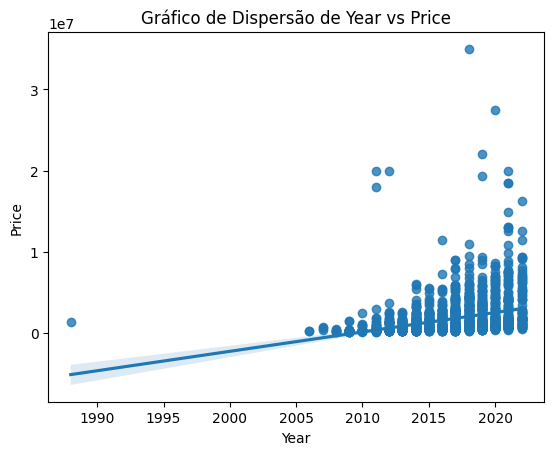

In [ ]:
# Plot da reta estimada
var = 'Year'
sns.regplot(x=var, y='Price', data=df2)
plt.xlabel(var)
plt.ylabel('Price')
plt.title(f'Gráfico de Dispersão de {var} vs Price')
plt.show()

## 10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

Text(0, 0.5, 'Resíduos')

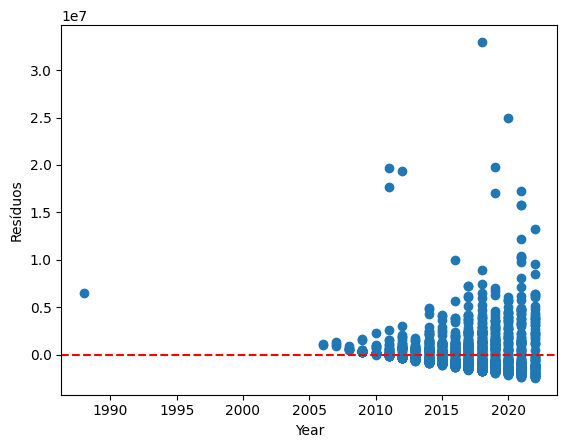

In [ ]:
# Calculando os valores preditos e os resíduos
y_pred = model.predict(X)
residuals = Y - y_pred

# Plot dos resíduos
plt.scatter(X['Year'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Resíduos')

## 11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
# Definindo X e Y
X = df2[['Year', 'Kilometer', 'Length', 'Height']]
Y = df2['Price']

# Adicionando uma constante
X = sm.add_constant(X)

# Criando o modelo
model_multi = sm.OLS(Y, X).fit()

# Exibindo a tabela de regressão
print(model_multi.summary())

# Calculando os valores preditos e os resíduos
y_pred_multi = model_multi.predict(X)
residuals_multi = Y - y_pred_multi

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     315.0
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          2.69e-207
Time:                        03:26:25   Log-Likelihood:                -29727.
No. Observations:                1874   AIC:                         5.946e+04
Df Residuals:                    1869   BIC:                         5.949e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.824e+08   2.95e+07    -12.961      0.0

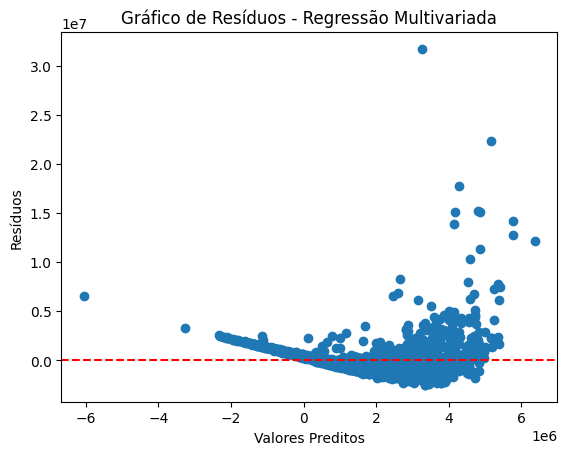

In [ ]:
# Plot dos resíduos
plt.scatter(y_pred_multi, residuals_multi)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos - Regressão Multivariada')
plt.show()